# Travel Insurance Claim Prediction using Machine Learning Algorithms

### Importing the libraires

In [53]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import missingno
import scipy.stats as ss
from sklearn.impute import SimpleImputer 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder

### Reading data

In [2]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )

In [3]:
insurance_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,NaN,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,NaN,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,NaN,61,0


In [4]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [5]:
test_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.00,0.00,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.00,0.00,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.00,0.00,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.00,0.00,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.00,0.00,NaN,33
...,...,...,...,...,...,...,...,...,...,...
15827,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,MALAYSIA,25.00,0.00,NaN,43
15828,C2B,Airlines,Online,Annual Silver Plan,409,SINGAPORE,252.85,63.21,F,20
15829,JWT,Airlines,Online,Value Plan,54,INDIA,31.00,12.40,F,118
15830,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,30,UNITED ARAB EMIRATES,0.00,11.88,NaN,31


In [6]:
insurance_data.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [7]:
insurance_data.tail(5)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,NaN,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,NaN,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,NaN,61,0
48259,EPX,Travel Agency,Online,1 way Comprehensive Plan,35,NEW ZEALAND,20.0,0.00,NaN,29,0


In [8]:
insurance_data.shape

(48260, 11)

In [9]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [10]:
insurance_data['Claim'] = insurance_data.Claim.astype('str')

In [11]:
insurance_data.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
Claim                    object
dtype: object

We have 4 Numericals Data columns and 7 Categorical Data columns

In [12]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age
count,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269
std,104.828147,48.823217,19.695339,14.027329
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,53.000000,48.000000,11.630000,43.000000
max,4881.000000,666.000000,262.760000,118.000000


### Exploratory Data Analysis & Data Preprocessing 

Now, we will do some data exploration and find out insights from the data and will check for imbalanced data on target variable i.e. the number of samples belonging to each of the two classes claimed status and unclaimed status. We will also determine if the dataset contains any missing values.

<AxesSubplot:xlabel='Claim', ylabel='count'>

Text(0.5, 1.0, 'Target Label Distribution')

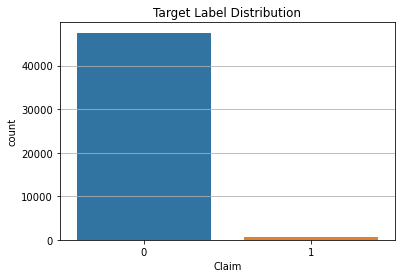

In [13]:
sns.countplot(insurance_data["Claim"])
plt.title("Target Label Distribution")
plt.grid(axis='y')
plt.show()

We have Imbalanced dataset where we observed that
Claimed policies are 927 and
UnClaimed policies are 47333.



 Oversample method will be performed to deal with imblancing problems.

Let's check if there are any missing values in Data 

<AxesSubplot:>

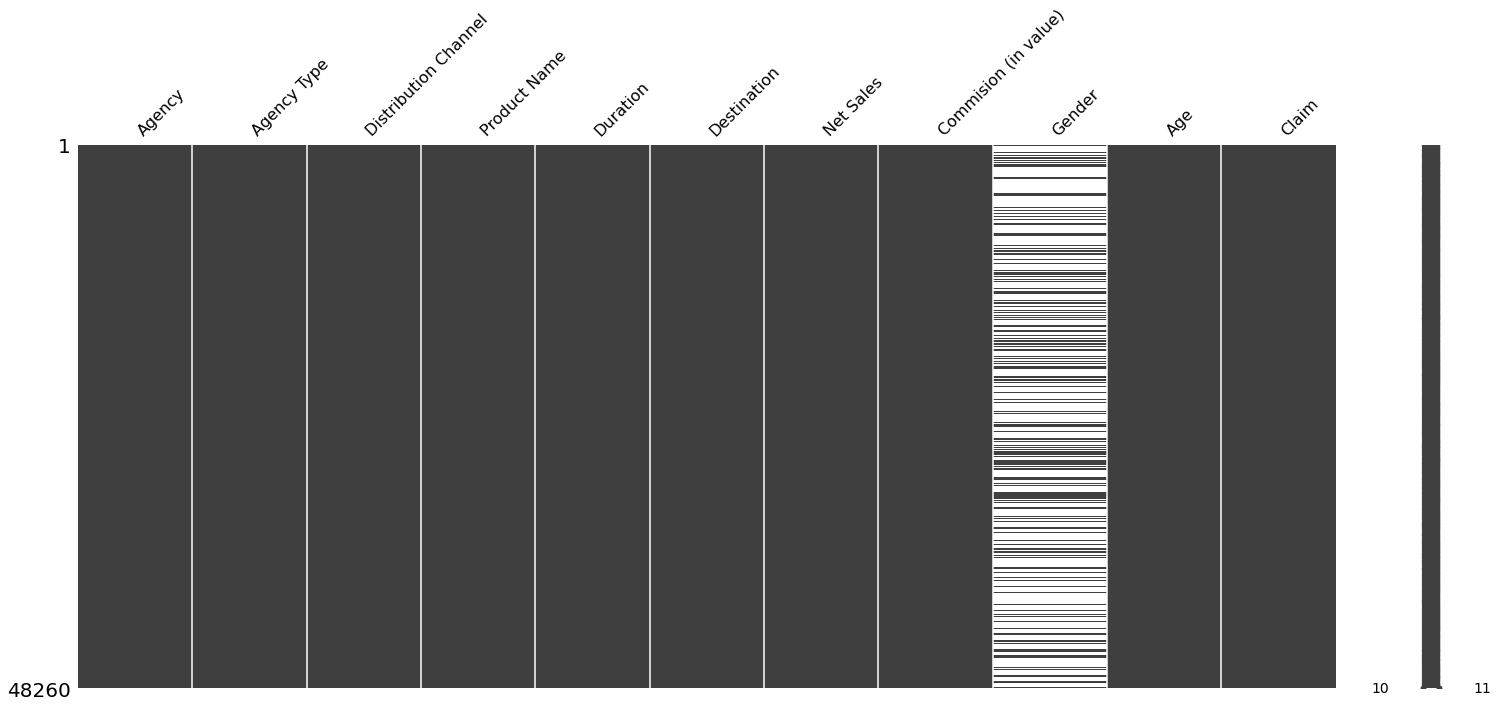

In [14]:
missingno.matrix(insurance_data)

Black" in the data depicts the column is fill with data and "White" depicts they have null values in that particular area

So, we can conclude that only "Gender" have the null values and seems quite much.
Lets see whats the number of null values in the "Gender" column

In [15]:
insurance_data_missing=(insurance_data.isnull().sum())
insurance_data_missing

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [16]:
(insurance_data_missing[insurance_data_missing > 0]/insurance_data.shape[0])*100

Gender    71.199751
dtype: float64

As we can see only have 71% missing values in gender column which is categorical so we will replace the null values with another category called "Not Specified"

In [17]:
insurance_data.fillna('Not Specified',inplace=True)

In [18]:
insurance_data.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

Lets Check how Gender is related to the Claim column

In [19]:
Gender_claim=[(insurance_data[insurance_data['Gender']=='Not Specified']['Claim'].value_counts()/len(insurance_data[insurance_data['Gender']=='Not Specified']['Claim']))[1],(insurance_data[insurance_data['Gender']=='M']['Claim'].value_counts()/len(insurance_data[insurance_data['Gender']=='M']['Claim']))[1],
      (insurance_data[insurance_data['Gender']=='F']['Claim'].value_counts()/len(insurance_data[insurance_data['Gender']=='F']['Claim']))[1]]

In [20]:
Gender_claim

[0.006548121416722447, 0.031946195880622114, 0.03771073646850044]

<AxesSubplot:xlabel='Claim', ylabel='count'>

[Text(0.5, 1.0, 'Distribution of claims for null gender')]

Text(1, 30000, '% of 1 class: 0.01')

<AxesSubplot:xlabel='Claim', ylabel='count'>

[Text(0.5, 1.0, 'Distribution of claims for Male')]

Text(1, 6000, '% of 1 class: 0.03')

<AxesSubplot:xlabel='Claim', ylabel='count'>

[Text(0.5, 1.0, 'Distribution of claims for Female')]

Text(1, 6000, '% of 1 class: 0.04')

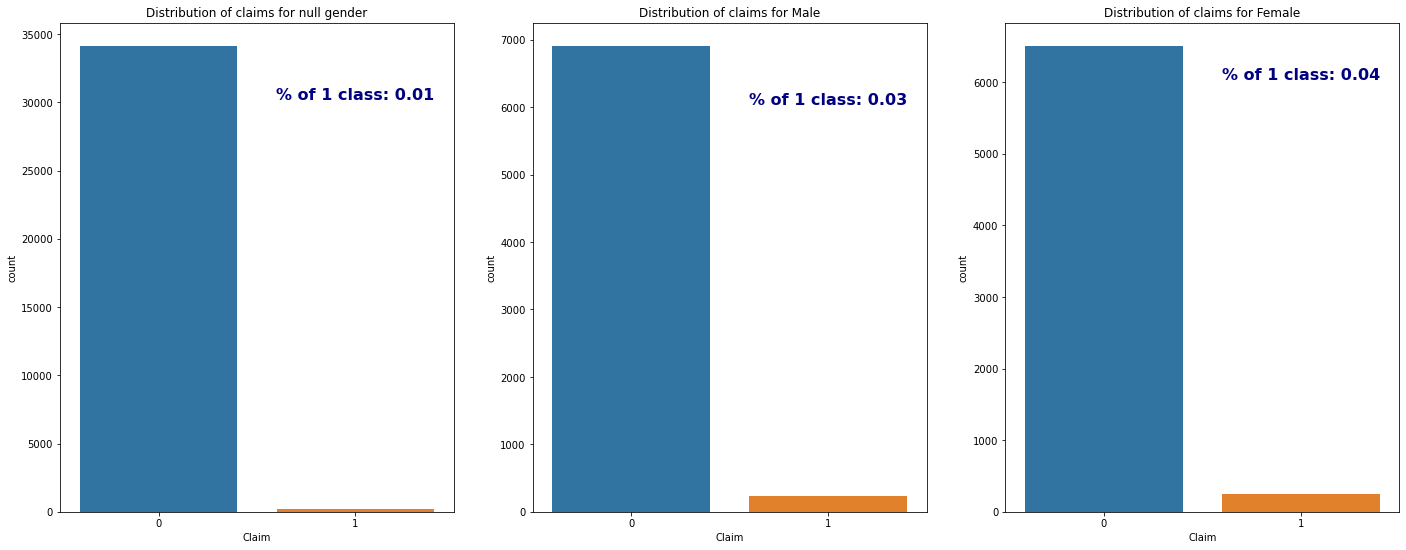

In [21]:
fig, axes=plt.subplots(1,3,figsize=(24,9))
sns.countplot(insurance_data[insurance_data['Gender']=='Not Specified']['Claim'],ax=axes[0])
axes[0].set(title='Distribution of claims for null gender')
axes[0].text(x=1,y=30000,s=f'% of 1 class: {round(Gender_claim[0],2)}',fontsize=16,weight='bold',ha='center',va='bottom',color='navy')
sns.countplot(insurance_data[insurance_data['Gender']=='M']['Claim'],ax=axes[1])
axes[1].set(title='Distribution of claims for Male')
axes[1].text(x=1,y=6000,s=f'% of 1 class: {round(Gender_claim[1],2)}',fontsize=16,weight='bold',ha='center',va='bottom',color='navy')
sns.countplot(insurance_data[insurance_data['Gender']=='F']['Claim'],ax=axes[2])
axes[2].set(title='Distribution of claims for Female')
axes[2].text(x=1,y=6000,s=f'% of 1 class: {round(Gender_claim[2],2)}',fontsize=16,weight='bold',ha='center',va='bottom',color='navy')
plt.show()

 Female Gender have highest number of Claims approved. Though the numbers aren't that descriptive to conclude to a decision

We will make an another dataframe which consist of only numerical columns from insurance_data

In [22]:
df_numerical=insurance_data._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              48260 non-null  int64  
 1   Net Sales             48260 non-null  float64
 2   Commision (in value)  48260 non-null  float64
 3   Age                   48260 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 MB


Now lets look at the spread of the numerical data

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Duration'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Net Sales'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Commision (in value)'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Age'>

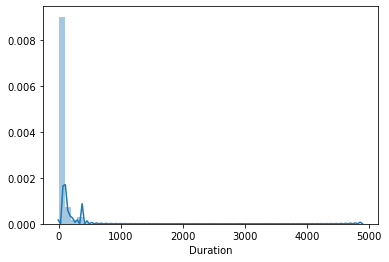

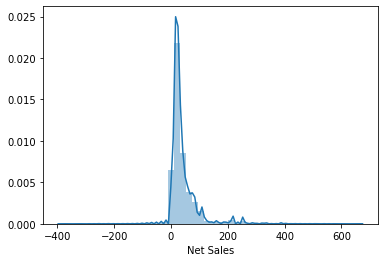

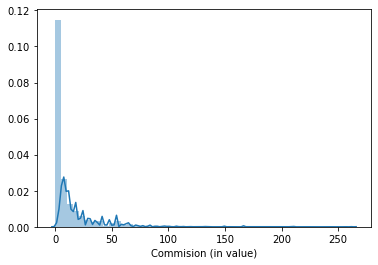

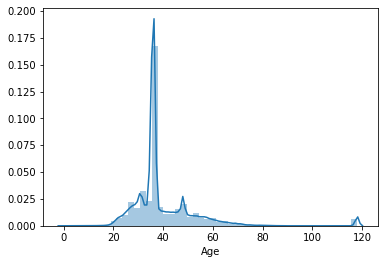

In [23]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.distplot(df_numerical[col])

we can conclude that:

Duration Column's data is highly right skewed.

Net Sales and Commison columns seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.

Column Age is random so its distribution can be random.

Lets check the data in "Duration" column

In [24]:
df_numerical['Duration'].describe()

count    48260.000000
mean        49.546602
std        104.828147
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

We have negative values in this Duration column but time cannot be negative and Lets check how many negative values we have in Duration column and we gonna replace those with the mean value


In [25]:
Duration_negative=insurance_data['Duration']<0
Duration_negative.sum()

3

In [26]:
insurance_data.loc[insurance_data['Duration'] < 0, 'Duration'] = 49.546602

In [27]:
duration_df=insurance_data['Duration']<0
duration_df.sum()

0

Previously we have checked that some columns have low Net Sales but High Commison but thats not possible
Lets see how many such columns we have and we will make all comission value 0 where net sales is 0.

In [28]:
Commision_sales= insurance_data['Net Sales']<insurance_data['Commision (in value)']
Commision_sales.sum()

1539

In [29]:
insurance_data.loc[insurance_data['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [30]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age
count,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.549765,40.747647,9.220919,39.927269
std,104.827380,48.823217,19.260648,14.027329
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,53.000000,48.000000,10.500000,43.000000
max,4881.000000,666.000000,262.760000,118.000000


We observed Mean value of column 'Commission' has been updated after making all comission value 0 where net sales is 0.



Checking the Age Column 

In [31]:
age100=insurance_data[insurance_data["Age"] > 100]
age100

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
114,JWT,Airlines,Online,Value Plan,21.0,INDIA,120.0,48.00,M,118,0
169,CCR,Travel Agency,Offline,Comprehensive Plan,34.0,THAILAND,0.0,0.00,F,118,0
295,CCR,Travel Agency,Offline,Comprehensive Plan,5.0,MALAYSIA,29.0,9.57,M,118,0
318,JWT,Airlines,Online,Value Plan,36.0,INDIA,31.0,12.40,M,118,0
395,JWT,Airlines,Online,Value Plan,36.0,INDIA,39.0,15.60,M,118,0
...,...,...,...,...,...,...,...,...,...,...,...
47786,JWT,Airlines,Online,Value Plan,1.0,INDIA,31.0,12.40,M,118,0
47878,CCR,Travel Agency,Offline,Comprehensive Plan,50.0,THAILAND,29.0,9.57,F,118,0
48197,JWT,Airlines,Online,Value Plan,2.0,INDIA,31.0,12.40,F,118,0
48243,EPX,Travel Agency,Offline,2 way Comprehensive Plan,16.0,"TAIWAN, PROVINCE OF CHINA",30.0,0.00,Not Specified,118,0


In [32]:
insurance_data.loc[insurance_data['Age'] > 100, 'Age'] = 39.927269

In [33]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age
count,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.549765,40.747647,9.220919,38.709101
std,104.827380,48.823217,19.260648,10.008714
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,53.000000,48.000000,10.500000,42.000000
max,4881.000000,666.000000,262.760000,88.000000


In [34]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [37]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination','Gender']

In [38]:
#look unique value for each columns
for col in categorical:
    uniq = len(insurance_data[col].unique())
    print(f'{col} :{uniq} Categories')

Agency :16 Categories
Agency Type :2 Categories
Distribution Channel :2 Categories
Product Name :26 Categories
Destination :141 Categories
Gender :3 Categories


<Figure size 720x504 with 0 Axes>

<AxesSubplot:ylabel='column'>

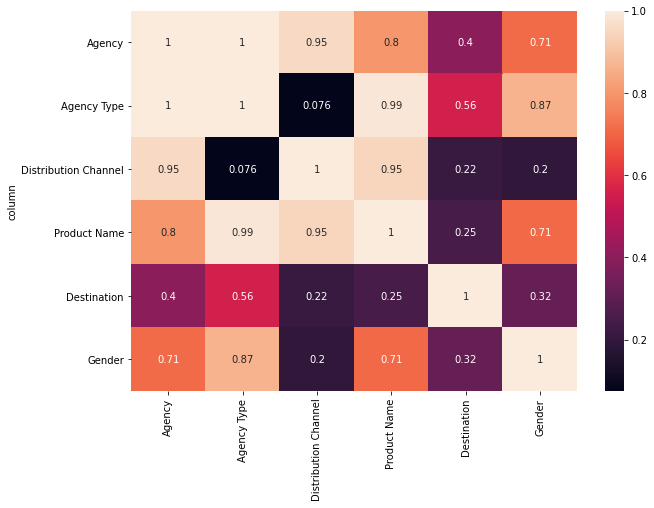

In [39]:
cramers=pd.DataFrame({i:[cramers_v(insurance_data[i],insurance_data[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

By looking to above correlation plot between the Categorical columns we can conclude that the cloumn "Agency Type' have high corelation with some of the columns like "Agency","Product Name" thus we can drop "Agency Type".

In [40]:
insurance_data['Agency Type'].value_counts()

Travel Agency    34917
Airlines         13343
Name: Agency Type, dtype: int64

In [41]:
Agency_Agencytype = pd.crosstab(insurance_data['Agency'],insurance_data['Agency Type'],margins=True)
Agency_Agencytype


Agency Type,Airlines,Travel Agency,All
Agency,,,
ADM,0,56,56
ART,248,0,248
C2B,6280,0,6280
CBH,0,70,70
CCR,0,155,155
CSR,0,66,66
CWT,0,6572,6572
EPX,0,26712,26712
JWT,580,0,580


Does Claim % depends on Agency Type ?

In [42]:
Claim_Agencytype=pd.crosstab(insurance_data['Agency'],insurance_data['Claim'],margins=True)

Claim_Agencytype.drop(index=['All'],inplace=True)
Claim_Agencytype=(Claim_Agencytype.div(Claim_Agencytype['All'],axis=0))*100

Claim_Agencytype['mean commision']=insurance_data.groupby('Agency')['Commision (in value)'].mean()
Claim_Agencytype


Claim,0,1,All,mean commision
Agency,,,,
ADM,100.000000,0.000000,100.0,32.931071
ART,99.596774,0.403226,100.0,10.276290
C2B,93.391720,6.608280,100.0,20.303618
CBH,100.000000,0.000000,100.0,9.654857
CCR,98.064516,1.935484,100.0,10.029871
CSR,98.484848,1.515152,100.0,10.480000
CWT,98.995740,1.004260,100.0,28.626245
EPX,99.419736,0.580264,100.0,0.000000
JWT,99.310345,0.689655,100.0,21.544138


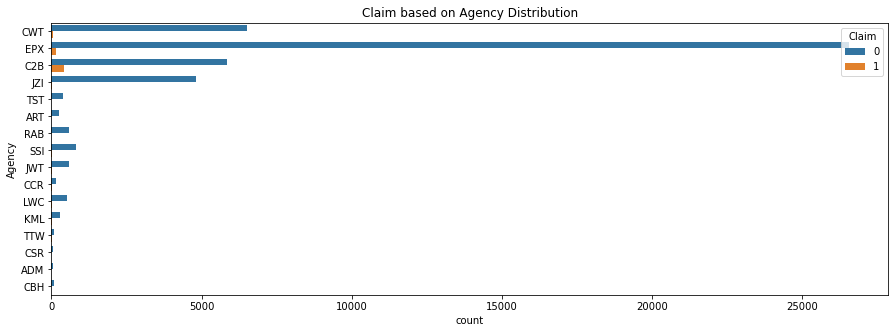

In [43]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Agency", hue='Claim', data=insurance_data).set_title('Claim based on Agency Distribution');

Does the duration of the trip have an impact on claims acceptance



In [44]:
Duration_claim=insurance_data.copy()
Duration_claim['Duration_label']=pd.qcut(insurance_data['Duration'],q=35)
df_durationclaim=pd.crosstab(Duration_claim['Duration_label'],Duration_claim['Claim'],normalize='index')
df_durationclaim

Claim,0,1
Duration_label,,
"(-0.001, 2.0]",0.997251,0.002749
"(2.0, 3.0]",0.993696,0.006304
"(3.0, 4.0]",0.995257,0.004743
"(4.0, 5.0]",0.992500,0.007500
"(5.0, 6.0]",0.989770,0.010230
"(6.0, 7.0]",0.994649,0.005351
"(7.0, 8.0]",0.987879,0.012121
"(8.0, 9.0]",0.988397,0.011603
"(9.0, 10.0]",0.988157,0.011843


On varying the value of bins, we found that Durations>364 have a high percentage of acceptance compared to the rest.

Claims based on Destination 

In [45]:
Destination_claims=pd.crosstab(insurance_data['Destination'],insurance_data['Claim'],margins=True,normalize='index')
Destination_claims

Claim,0,1
Destination,,
ALBANIA,1.000000,0.000000
ANGOLA,1.000000,0.000000
ARGENTINA,0.937500,0.062500
ARMENIA,1.000000,0.000000
AUSTRALIA,0.988956,0.011044
...,...,...
VIET NAM,0.994599,0.005401
"VIRGIN ISLANDS, U.S.",1.000000,0.000000
ZAMBIA,1.000000,0.000000


Dummifying Categorical columns

In [ ]:
#cat_insurance_data = pd.get_dummies(data=insurance_data, columns=['Agency','Agency Type','Product Name','Destination'], drop_first=True)

In [46]:
df_numerical.tail()

,Duration,Net Sales,Commision (in value),Age
48255,39,44.0,0.00,36
48256,20,60.0,15.00,30
48257,19,29.7,17.82,43
48258,7,20.0,0.00,61
48259,35,20.0,0.00,29


In [47]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination','Gender']
insurance_data[categorical] = insurance_data[categorical].astype('category') 

In [48]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Agency                48260 non-null  category
 1   Agency Type           48260 non-null  category
 2   Distribution Channel  48260 non-null  category
 3   Product Name          48260 non-null  category
 4   Duration              48260 non-null  float64 
 5   Destination           48260 non-null  category
 6   Net Sales             48260 non-null  float64 
 7   Commision (in value)  48260 non-null  float64 
 8   Gender                48260 non-null  category
 9   Age                   48260 non-null  float64 
 10  Claim                 48260 non-null  object  
dtypes: category(6), float64(4), object(1)
memory usage: 2.2+ MB


<AxesSubplot:xlabel='Claim', ylabel='count'>

Text(0.5, 1.0, 'Target Label Distribution After Reducing')

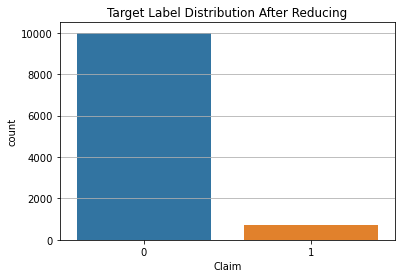

In [49]:
#reducing Target No due to severe imbalance
random_no = insurance_data[insurance_data['Claim']=='0'].sample(frac=1)
n_to_drop = len(random_no) - 10000

clean_reduce = insurance_data.drop(axis=0, index=random_no.index[:n_to_drop])

#target columns
sns.countplot(clean_reduce['Claim'])
plt.title("Target Label Distribution After Reducing")
plt.grid(axis='y')
plt.show()

In [54]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = insurance_data['Claim']
labels = le.fit_transform(insurance_data['Claim'])

Splitting Data into train and test

In [56]:
#split label and features
#One Hot Encoding for categorical data
X = clean_reduce.drop(columns=['Claim'])
X = pd.get_dummies(X, columns=categorical).values
y = insurance_data['Claim'].replace(labels).values
y = clean_reduce['Claim']
print(f'Datasets Features Size {X.shape}')

#X, y without Oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print('Traininng shape %s' % Counter(y_train))
print('Testing shape %s' % Counter(y_test))

Datasets Features Size (10708, 194)
Traininng shape Counter({'0': 7990, '1': 576})
Testing shape Counter({'0': 2010, '1': 132})


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

Using Smotin Method to tackle imbalanced data

In [ ]:
smote = SMOTENC()
X_train, y_train = smote.fit_sample(X_train, y_train)
X_test, y_test = smote.fit_sample(X_test, y_test)
